In [1]:
import os

In [2]:
import tensorflow as tf

In [3]:
os.chdir('/')

In [4]:
os.listdir('/home/matflig/copydata/trn/Italian/')

['220926_0.jpg',
 '466564_1.jpg',
 '218057_1.jpg',
 '223448_0.jpg',
 '98398_0.jpg',
 '228934_1.jpg',
 '463543_2.jpg',
 '222494_0.jpg',
 '212426_0.jpg',
 '198568_1.jpg',
 '214904_0.jpg',
 '223557_1.jpg',
 '468163_0.jpg',
 '469054_2.jpg',
 '230222_0.jpg',
 '81522_0.jpg',
 '223028_2.jpg',
 '157835_0.jpg',
 '91884_3.jpg',
 '224514_0.jpg',
 '221324_0.jpg',
 '215052_0.jpg',
 '213226_0.jpg',
 '463706_5.jpg',
 '216891_0.jpg',
 '227431_0.jpg',
 '212804_0.jpg',
 '224495_0.jpg',
 '230285_1.jpg',
 '466771_2.jpg',
 '464118_1.jpg',
 '503932_7.jpg',
 '32799_0.jpg',
 '230043_2.jpg',
 '26447_3.jpg',
 '221290_2.jpg',
 '230298_0.jpg',
 '23120_3.jpg',
 '217986_0.jpg',
 '230239_0.jpg',
 '119419_0.jpg',
 '505741_2.jpg',
 '84003_3.jpg',
 '218027_1.jpg',
 '98373_1.jpg',
 '115496_4.jpg',
 '504490_4.jpg',
 '25367_1.jpg',
 '463529_2.jpg',
 '230662_1.jpg',
 '464462_0.jpg',
 '23237_5.jpg',
 '193576_0.jpg',
 '26429_4.jpg',
 '217123_1.jpg',
 '230551_1.jpg',
 '121207_0.jpg',
 '230421_1.jpg',
 '230601_1.jpg',
 '200647

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 911303559987668930
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2634106222757280140
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7439494786613955820
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14728907981
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7278422920106827434
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


Populating the interactive namespace from numpy and matplotlib


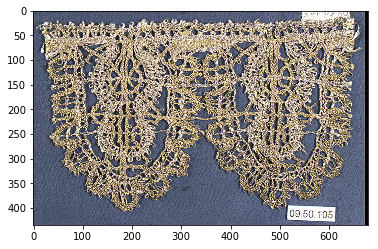

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/home/matflig/copydata/trn/Italian/215506_0.jpg')
imgplot = plt.imshow(img)
plt.show()

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=r"/home/matflig/copydata/trn",
    target_size=(256,256),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 92995 images belonging to 5 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=r"/home/matflig/copydata/test",
    target_size=(256,256),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)


Found 12156 images belonging to 5 classes.


In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [5]:
model = models.Sequential()
#model.add(InputLayer(input_shape=))

#model.add(Reshape((32, 32, 3)))

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3))) #was 32, 32, 3, but our data is 256, 256, 3
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
#adding an extra conv2d layer to make it way smaller, and reduce the number of params
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

In [7]:
#adding dense layers afterwards; changed final layer to 5 from 10 as we only have 5 classes
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

In [9]:
#set steps per epoch for val, and train

spe_t = round(92995/32 *.75)
spe_v = round(12156/32 *.5)

print(spe_t, spe_v)

2180 190


In [10]:
import os
os.getcwd()

'/home/matflig/.jupyter'

In [13]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.01, patience=2)

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


chk = tf.keras.callbacks.ModelCheckpoint("training_v1.weights.{epoch:02d}-{val_loss:.2f}.hdf5", monitor='val_accuracy', 
                                         verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')


In [22]:
#compile, train, not changing any of these rn

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              #changed to categorical crossentropy from sparsecategoricalcrossentropy
              metrics=['accuracy'])

#history = model.fit(train_images, train_labels, epochs=10, 
#                    validation_data=(test_images, test_labels))

history = model.fit(x=train_generator,
        epochs=10,
        validation_data=test_generator, callbacks=[callback, chk], steps_per_epoch = spe_t, validation_steps = spe_v,
                    verbose=1, workers=12, 
        )

#I can use model.fit next time.  It gives an error here that may not arise in fit_generator.
#history = model.fit_generator(train_generator, epochs=10, verbose = 1, validation_data=test_generator)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2180 steps, validate for 190 steps
Epoch 1/10
2179/2180 [============================>.] - ETA: 1s - loss: 1.3265 - accuracy: 0.3819
Epoch 00001: saving model to training_v1.weights.01-1.37.hdf5
2180/2180 [==============================] - 4880s 2s/step - loss: 1.3264 - accuracy: 0.3819 - val_loss: 1.3671 - val_accuracy: 0.3766
Epoch 2/10
2179/2180 [============================>.] - ETA: 2s - loss: 1.2482 - accuracy: 0.4300
Epoch 00002: saving model to training_v1.weights.02-1.37.hdf5
2180/2180 [==============================] - 5629s 3s/step - loss: 1.2481 - accuracy: 0.4300 - val_loss: 1.3716 - val_accuracy: 0.3957
Epoch 3/10
2179/2180 [============================>.] - ETA: 2s - loss: 1.1443 - accuracy: 0.4915
Epoch 00003: saving model to training_v1.weights.03-1.30.hdf5
2180/2180 [==============================] - 5630s 3s/step - loss: 1.1443 - accuracy: 0.4915 - val_loss: 1.2958 - val_accuracy: 0.4911
Epoch 4/10
2179/2180

In [23]:
model_json = model.to_json()
with open("model_cnn_base.json", "w") as json_file:
    json_file.write(model_json)

json_file.close()

model.save_weights("model_cnn_base.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
model.layers[3].get_weights()

[array([[[[ 0.01624282,  0.06927168, -0.00431316, ...,  0.03783872,
           -0.15072702,  0.01098775],
          [-0.07530022, -0.16867493, -0.12130667, ..., -0.07912404,
           -0.11343942, -0.15270087],
          [ 0.1396832 ,  0.2593114 , -0.07643145, ...,  0.15517522,
            0.1489801 , -0.15119241],
          ...,
          [ 0.34463346, -0.16602029, -0.07902845, ..., -0.06502484,
            0.02996739, -0.15914182],
          [-0.08725161, -0.04066763,  0.05507175, ..., -0.23708737,
           -0.2542367 , -0.3014427 ],
          [ 0.0037572 , -0.09376901, -0.08602662, ..., -0.11566268,
           -0.22121145,  0.03347336]],
 
         [[-0.02690983,  0.10320043, -0.08904471, ..., -0.08291499,
           -0.15243268,  0.03692356],
          [-0.17683806, -0.08658249, -0.19807968, ..., -0.15606225,
           -0.28035393, -0.27567822],
          [ 0.18241453,  0.30780992, -0.062986  , ...,  0.13268943,
            0.01898521, -0.17720354],
          ...,
          [ 0

This ran, saved, and loaded into local, I think we're set here!

In [1]:
#from tensorflow.keras import create_model
#model_latest_checkpoint = create_model()
model_latest_checkpoint = model
# Load the previously saved weights
model_latest_checkpoint.load_weights("/home/matfligtraining_v1.weights.01-1.52.hdf5")

NameError: name 'model' is not defined

In [33]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [34]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name=u'/physical_device:GPU:0', device_type=u'GPU')]

https://stackoverflow.com/questions/58441514/why-is-tensorflow-2-much-slower-than-tensorflow-1